In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
excelfile = pd.ExcelFile('Hash-Analytic-Python-Analytics-Problem.xlsx')
data = excelfile.parse('data')  # universal data

existing = excelfile.parse('Existing employees')    # existing employees dataset
attrition = excelfile.parse('Attrition')            # ex-employees dataset

In [26]:
data = data.iloc[:, 1:]

data.info()
# existing.info()
# attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
Left                     14999 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [27]:
# information about the existing employees data
existing.describe()  

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [28]:
# information about the data of employees who have left
attrition.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [29]:
print(data.columns)  # features attribute for data analysis

# grouping the universal dataset based on the attribute 'Left'
left = data.groupby('Left')
left.mean()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Left'],
      dtype='object')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Left,,,,,,,
No,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
Yes,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


      satisfaction_level  last_evaluation  number_project  \
Left                                                        
No                 11428            11428           11428   
Yes                 3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
Left                                                            
No                   11428               11428          11428   
Yes                   3571                3571           3571   

      promotion_last_5years   dept  salary  
Left                                        
No                    11428  11428   11428  
Yes                    3571   3571    3571  


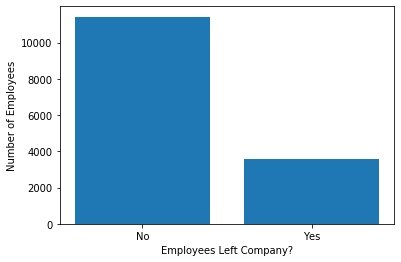

In [30]:
left_count = data.groupby('Left').count()
print(left_count)

plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.ylabel('Number of Employees')
plt.xlabel('Employees Left Company?')
# plt.title('Number of Employees who has left compare to those whose stayed in the company')
plt.savefig('hist of left&stay.png')
plt.show()

In [31]:
data.Left.value_counts()

No     11428
Yes     3571
Name: Left, dtype: int64

        satisfaction_level  last_evaluation  number_project  \
salary                                                        
high                  1237             1237            1237   
low                   7316             7316            7316   
medium                6446             6446            6446   

        average_montly_hours  time_spend_company  Work_accident  \
salary                                                            
high                    1237                1237           1237   
low                     7316                7316           7316   
medium                  6446                6446           6446   

        promotion_last_5years  dept  Left  
salary                                     
high                     1237  1237  1237  
low                      7316  7316  7316  
medium                   6446  6446  6446  


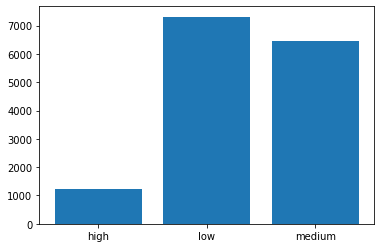

In [32]:
salary = data.groupby('salary').count()
print(salary)

plt.bar(salary.index.values, salary['Left'])
plt.show()

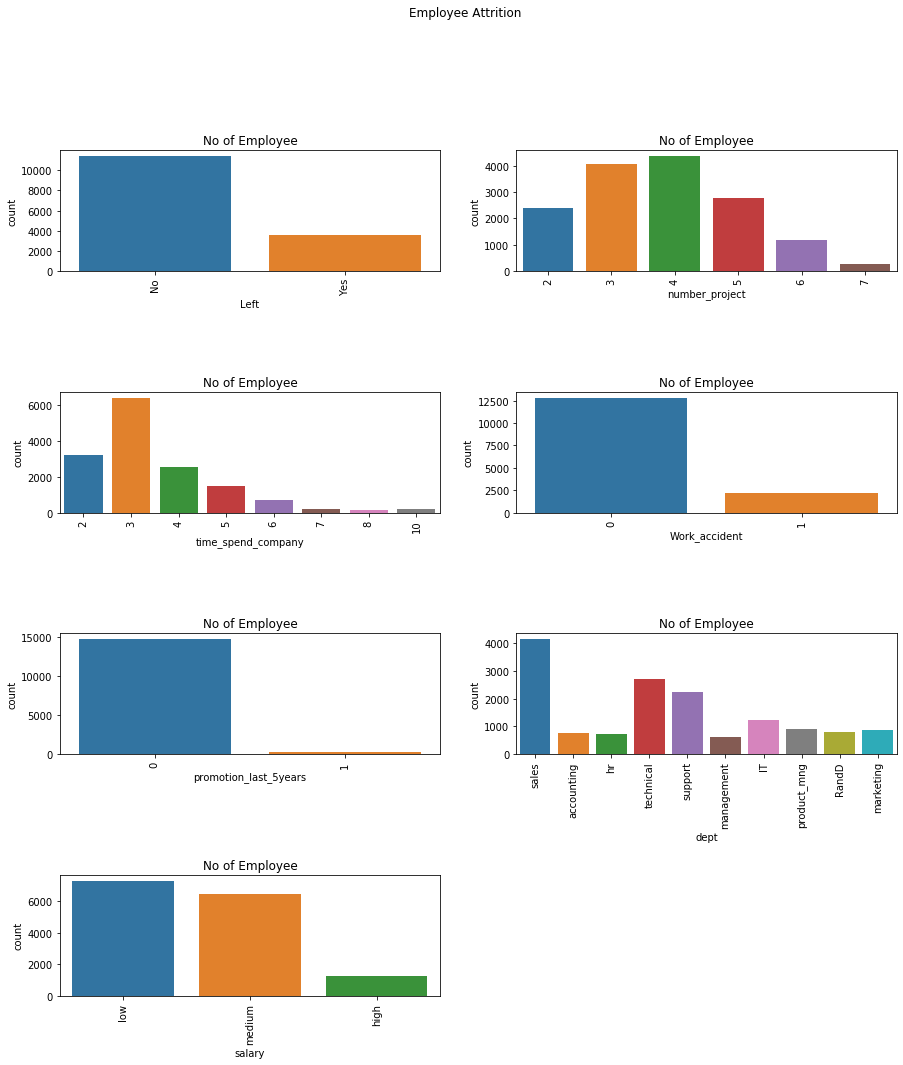

In [33]:
# visualization using seaborn

features = ['Left','number_project','time_spend_company','Work_accident',
            'promotion_last_5years','dept','salary']
plt.figure(figsize = (15,20))
for i,j in enumerate(features):
    plt.subplot(5,2, i+1)       # no of graphs (5x2 = nrow x ncol)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data)
    plt.title('No of Employee')
    plt.xticks(rotation=90)
    plt.savefig('Employee Attrition.png')
    plt.suptitle('Employee Attrition')

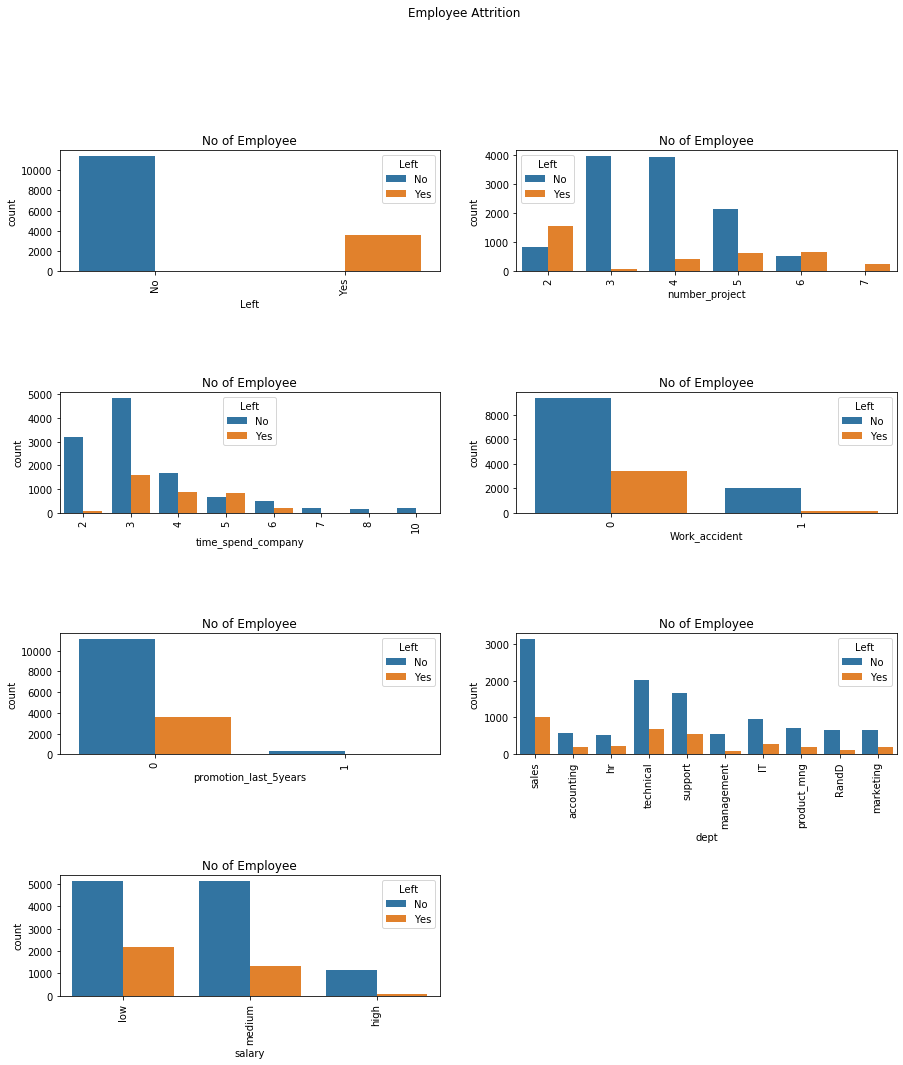

In [34]:
features = ['Left','number_project','time_spend_company','Work_accident',
            'promotion_last_5years','dept','salary']
plt.figure(figsize = (15,20))
for i,j in enumerate(features):
    plt.subplot(5,2, i+1)       # no of graphs (5x2 = nrow x ncol)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data, hue='Left')
    plt.title('No of Employee')
    plt.xticks(rotation=90)
    plt.savefig('Employee Attrition 2.png')
    plt.suptitle('Employee Attrition')

In [35]:
# Building a Prediction Model
# salary = {low:0, medium:1, high:2}
# dept = {}
# Left = {Yes:1, No:0}

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['dept'] = le.fit_transform(data['dept'])
# data['Left'] = le.fit_transform(data['Left'])

In [37]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
print(data)
# splitting data into features
x = data.iloc[:, :-1]
y = data.iloc[:, 9]

# print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

       satisfaction_level  last_evaluation  number_project  \
0                    0.58             0.74               4   
1                    0.82             0.67               2   
2                    0.45             0.69               5   
3                    0.78             0.82               5   
4                    0.49             0.60               3   
5                    0.36             0.95               3   
6                    0.54             0.37               2   
7                    0.99             0.91               5   
8                    0.50             0.75               6   
9                    0.74             0.64               4   
10                   0.56             0.58               4   
11                   0.34             0.39               2   
12                   0.48             0.94               5   
13                   0.73             0.62               3   
14                   0.59             0.87               3   
15      

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
y_pred = gb.predict(x_test)

print(y_test)
print(y_pred)

1670      No
13378    Yes
10233     No
4719      No
7003      No
2831      No
13013    Yes
11978    Yes
8610      No
519       No
13667    Yes
7329      No
452       No
12373    Yes
4067      No
10782     No
575       No
10279     No
12985    Yes
6183      No
11134     No
5890      No
5073      No
1844      No
4019      No
154       No
11333     No
5205      No
5900      No
8910      No
        ... 
8808      No
1551      No
12811    Yes
4324      No
2179      No
1906      No
9133      No
10846     No
14803    Yes
5048      No
7166      No
13131    Yes
4663      No
5252      No
9571      No
5218      No
9451      No
3510      No
3848      No
1051      No
13032    Yes
3858      No
6060      No
14180    Yes
9415      No
11275     No
3828      No
4645      No
6069      No
2506      No
Name: Left, Length: 4500, dtype: object
['No' 'Yes' 'No' ... 'No' 'No' 'No']


In [42]:
from sklearn.metrics import accuracy_score
# model accuracy
print("Accuracy:", accuracy_score(y_test,y_pred)*100)

Accuracy: 97.88888888888889
